<a href="https://colab.research.google.com/github/ilanmoshe52/NLP/blob/main/Wavedec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
pip install numpy pywavelets matplotlib

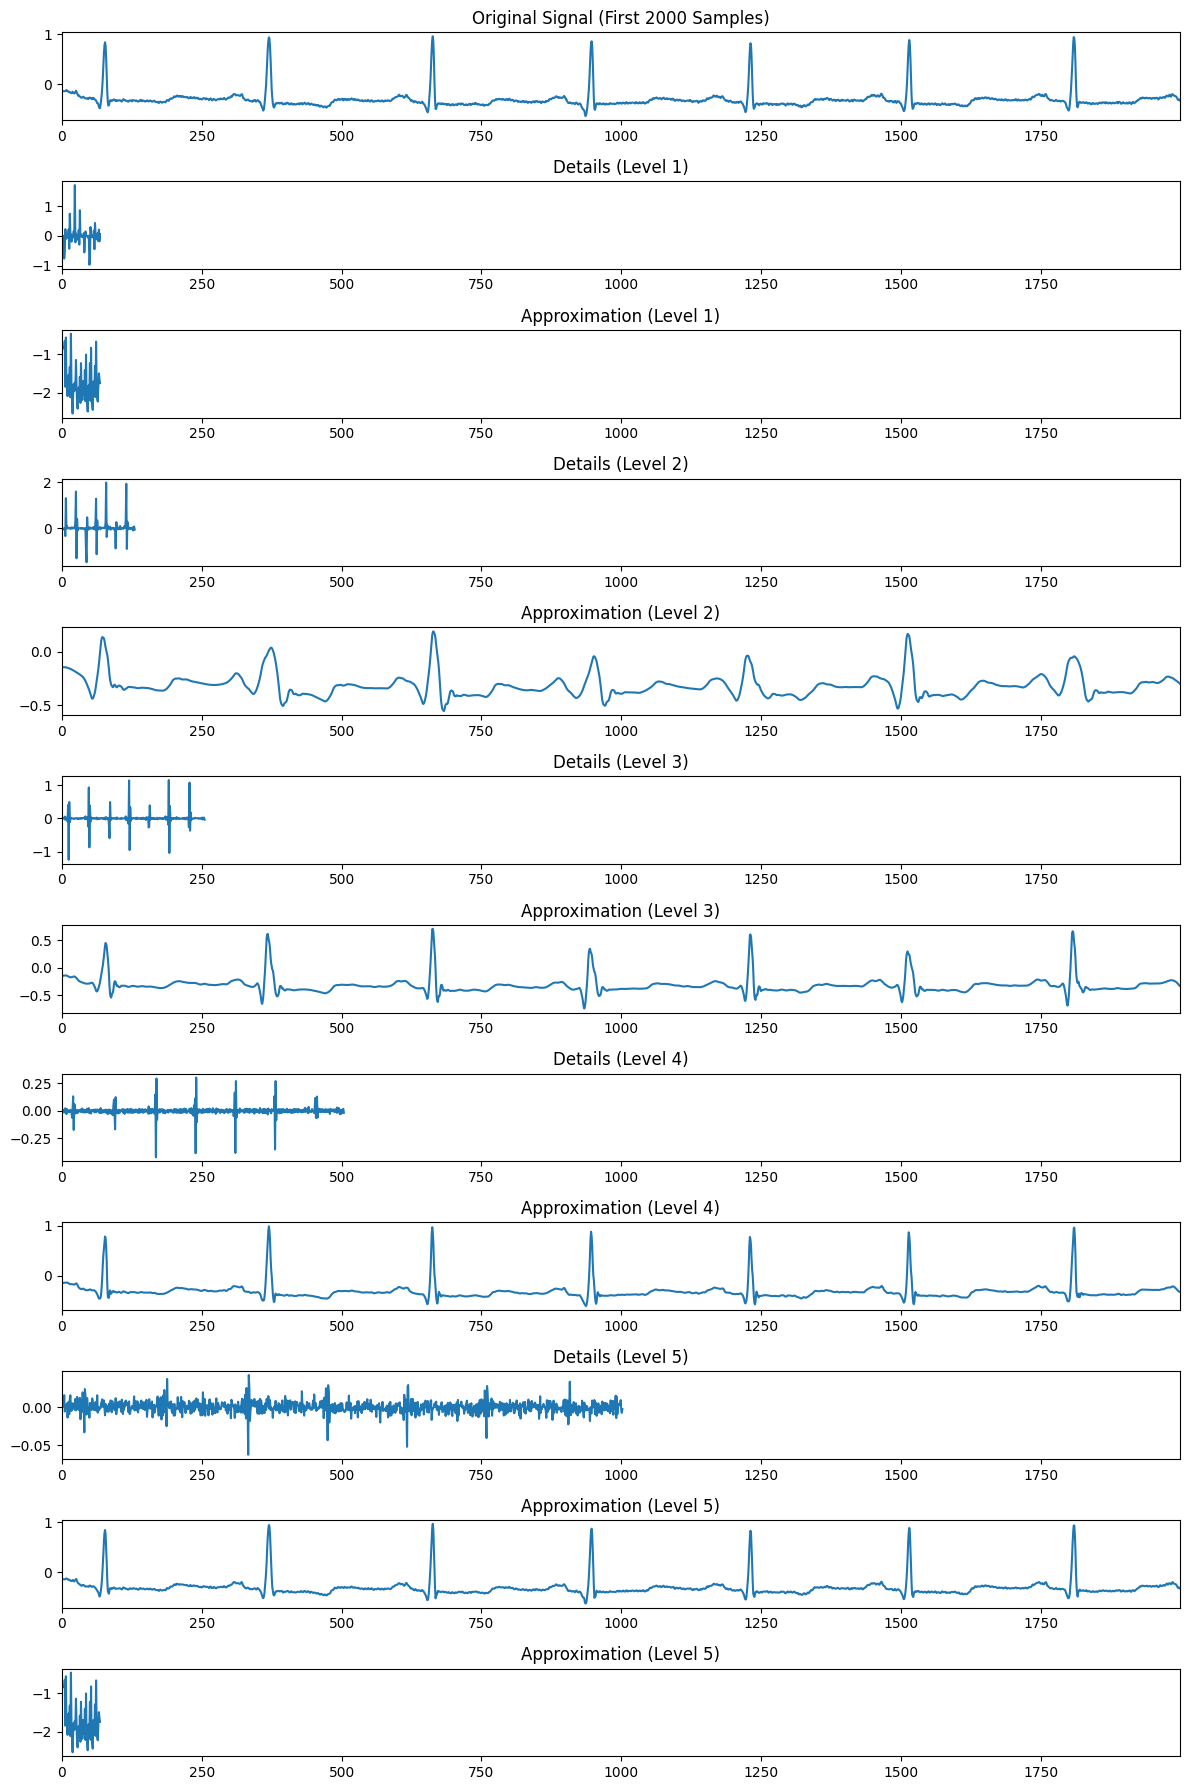

In [16]:

import numpy as np
import pywt
import matplotlib.pyplot as plt
import wfdb

# 1. Load WFDB signal (using 2000 samples)
record = wfdb.rdrecord('100', pn_dir='mitdb')  # Example: Replace '100' with your desired record name
wfdb_signal = record.p_signal[:, 0]  # Assuming you want the first lead. Adapt as needed.

# Extract the first 2000 samples
signal_length = 2000
original_signal = wfdb_signal[:signal_length]

# 2. Perform Discrete Wavelet Transform (DWT)
wavelet = 'db4'  # Choose a suitable wavelet (e.g., 'db4', 'haar', 'bior1.3')
levels = 5  # Number of decomposition levels

coeffs = pywt.wavedec(original_signal, wavelet, level=levels)

# 3. Plot the original signal
plt.figure(figsize=(12, 18))
plt.subplot(2 * levels + 2, 1, 1)  # +2 for original and title
plt.plot(original_signal)
plt.title('Original Signal (First 2000 Samples)')
plt.xlim(0, signal_length - 1)  # Set limit for the x-axis

# 4. Plot details and approximations at each level
for i in range(levels):
    # Details
    plt.subplot(2 * levels + 2, 1, 2 * i + 2)  # 2 plots per level
    cD = coeffs[i + 1]  # Detail coefficients
    plt.plot(cD)
    plt.title(f'Details (Level {i+1})')
    plt.xlim(0, signal_length - 1)  # Set limit for the x-axis

    # Approximations
    plt.subplot(2 * levels + 2, 1, 2 * i + 3)  # 2 plots per level
    if i == 0:
        cA = coeffs[0]  # Approximation at the finest level (Level 1)
    else:
        # Reconstruct approximation from coefficients up to current level
        partial_coeffs = coeffs[:i+1] + [None] * (levels - i) # Pad with None for higher levels
        cA = pywt.waverec(partial_coeffs, wavelet)[:signal_length] # Reconstruct and truncate
    plt.plot(cA)
    plt.title(f'Approximation (Level {i+1})')
    plt.xlim(0, signal_length - 1)  # Set limit for the x-axis


# 5. Last Approximation (at coarsest level)
plt.subplot(2 * levels + 2, 1, 2 * levels + 2)
cA_last = coeffs[0]
plt.plot(cA_last)
plt.title(f'Approximation (Level {levels})')
plt.xlim(0, signal_length - 1)


plt.tight_layout()  # Adjust subplot parameters for a tight layout
plt.show()

# ... (rest of the code for reconstruction and error calculation remains the same)

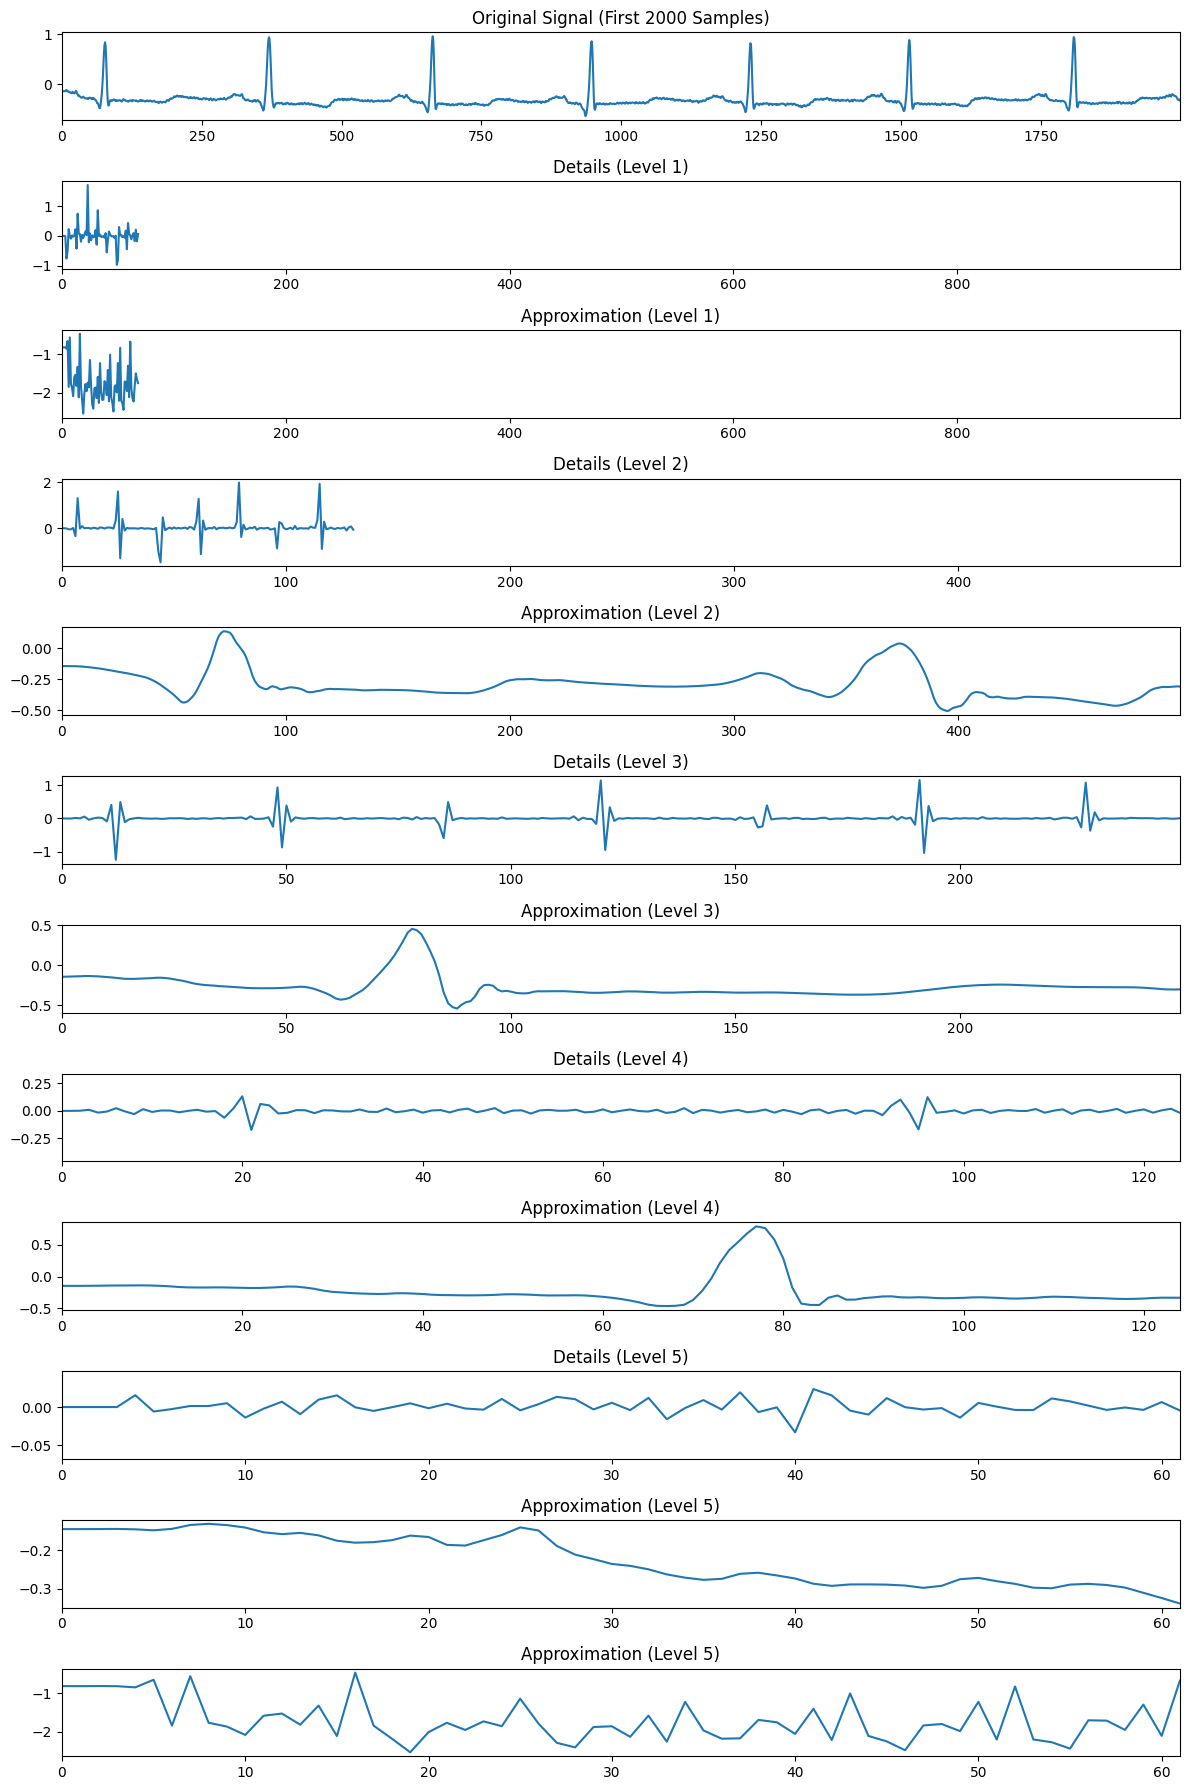

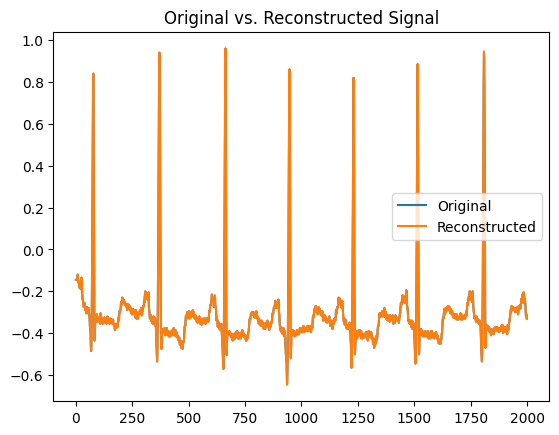

Reconstruction Error: 1.1785537823438828e-16


In [18]:

import numpy as np
import pywt
import matplotlib.pyplot as plt
import wfdb

# 1. Load WFDB signal (using 2000 samples)
record = wfdb.rdrecord('100', pn_dir='mitdb')  # Example: Replace '100' with your desired record name
wfdb_signal = record.p_signal[:, 0]  # Assuming you want the first lead. Adapt as needed.

# Extract the first 2000 samples
signal_length = 2000
original_signal = wfdb_signal[:signal_length]

# 2. Perform Discrete Wavelet Transform (DWT)
wavelet = 'db4'  # Choose a suitable wavelet (e.g., 'db4', 'haar', 'bior1.3')
levels = 5  # Number of decomposition levels

coeffs = pywt.wavedec(original_signal, wavelet, level=levels)

# 3. Plot the original signal
plt.figure(figsize=(12, 18))
plt.subplot(2 * levels + 2, 1, 1)  # +2 for original and title
plt.plot(original_signal)
plt.title('Original Signal (First 2000 Samples)')
plt.xlim(0, signal_length - 1)  # Set limit for the x-axis

# 4. Plot details and approximations at each level
for i in range(levels):
    level_length = signal_length // (2**(i+1))  # Calculate length at this level

    # Details
    plt.subplot(2 * levels + 2, 1, 2 * i + 2)  # 2 plots per level
    cD = coeffs[i + 1]  # Detail coefficients
    plt.plot(cD)
    plt.title(f'Details (Level {i+1})')
    plt.xlim(0, level_length - 1)  # Correct x-axis limit!

    # Approximations
    plt.subplot(2 * levels + 2, 1, 2 * i + 3)  # 2 plots per level
    if i == 0:
        cA = coeffs[0]  # Approximation at the finest level (Level 1)
        level_length_approx = signal_length // 2 # level 1 is divided by 2
    else:
        # Reconstruct approximation from coefficients up to current level
        partial_coeffs = coeffs[:i+1] + [None] * (levels - i) # Pad with None for higher levels
        cA = pywt.waverec(partial_coeffs, wavelet)[:signal_length] # Reconstruct and truncate
        level_length_approx = signal_length // (2**(i+1)) # other levels are divided by 2^(i+1)

    plt.plot(cA[:level_length_approx]) # Plot only the relevant part
    plt.title(f'Approximation (Level {i+1})')
    plt.xlim(0, level_length_approx - 1)  # Correct x-axis limit!


# 5. Last Approximation (at coarsest level)
level_length_last = signal_length // (2**levels)
plt.subplot(2 * levels + 2, 1, 2 * levels + 2)
cA_last = coeffs[0]
plt.plot(cA_last)
plt.title(f'Approximation (Level {levels})')
plt.xlim(0, level_length_last - 1)

plt.tight_layout()  # Adjust subplot parameters for a tight layout
plt.show()

# 6. Reconstruction (Optional - to verify DWT)
reconstructed_signal = pywt.waverec(coeffs, wavelet)

# Ensure both signals have the same length before comparing
min_len = min(len(original_signal), len(reconstructed_signal))
original_signal = original_signal[:min_len]
reconstructed_signal = reconstructed_signal[:min_len]

# 7. Verification: Plot reconstructed signal (optional)
plt.figure()
plt.plot(original_signal, label='Original')
plt.plot(reconstructed_signal, label='Reconstructed')
plt.legend()
plt.title('Original vs. Reconstructed Signal')
plt.show()

# 8. Calculate and print the reconstruction error (optional)
reconstruction_error = np.mean(np.abs(original_signal - reconstructed_signal))
print(f"Reconstruction Error: {reconstruction_error}")

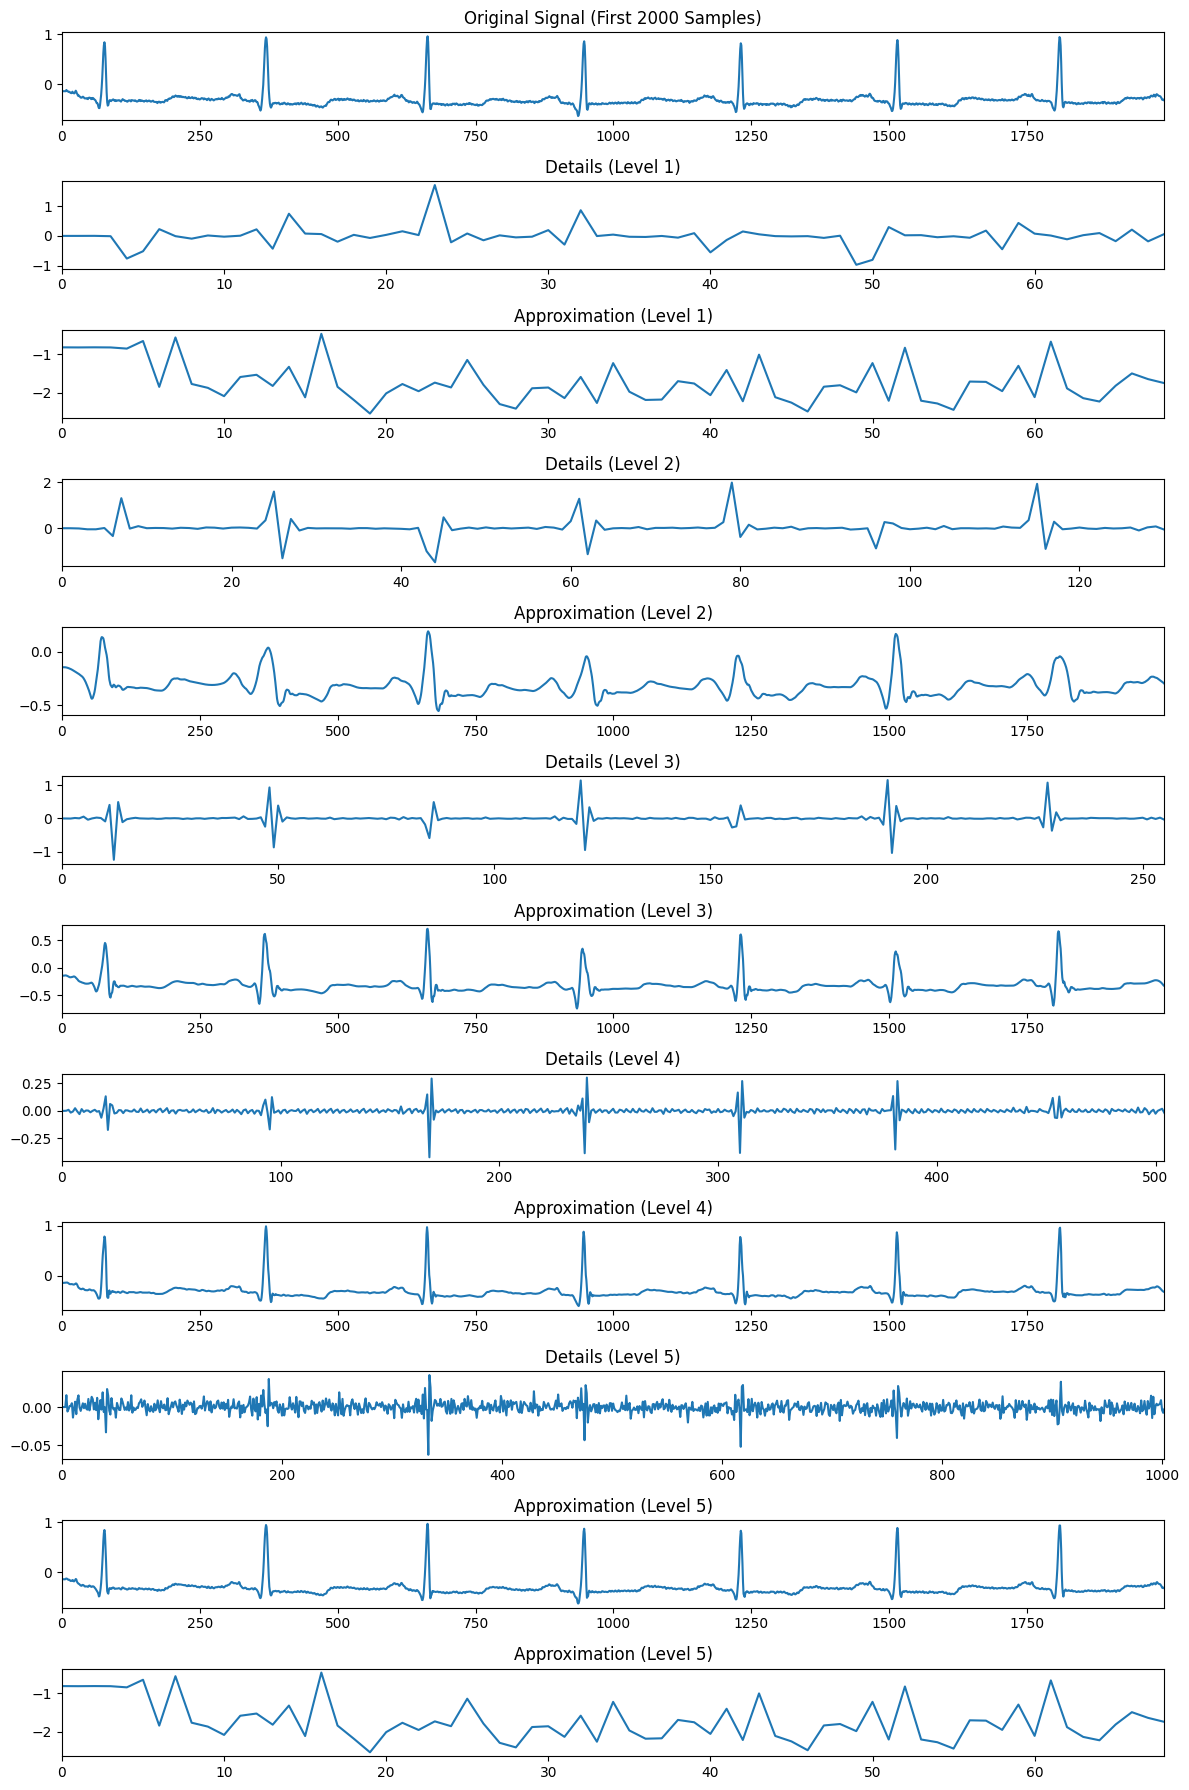

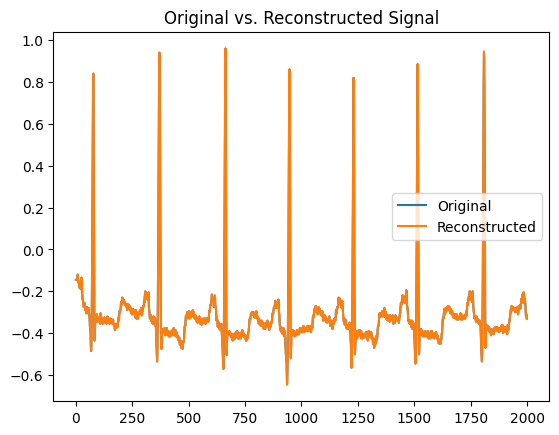

Reconstruction Error: 1.1785537823438828e-16


In [20]:

import numpy as np
import pywt
import matplotlib.pyplot as plt
import wfdb

# 1. Load WFDB signal
record = wfdb.rdrecord('100', pn_dir='mitdb')
wfdb_signal = record.p_signal[:, 0]
signal_length = 2000
original_signal = wfdb_signal[:signal_length]

# 2. Perform DWT
wavelet = 'db4'
levels = 5

coeffs = pywt.wavedec(original_signal, wavelet, level=levels)

# 3. Plot the original signal
plt.figure(figsize=(12, 18))
plt.subplot(2 * levels + 2, 1, 1)
plt.plot(original_signal)
plt.title('Original Signal (First 2000 Samples)')
plt.xlim(0, signal_length - 1)

# 4. Plot details and approximations at each level
for i in range(levels):
    # Details
    plt.subplot(2 * levels + 2, 1, 2 * i + 2)
    cD = coeffs[i + 1]
    plt.plot(cD)
    plt.title(f'Details (Level {i+1})')
    plt.xlim(0, len(cD) - 1)  # Use the actual length of cD

    # Approximations
    plt.subplot(2 * levels + 2, 1, 2 * i + 3)
    if i == 0:
        cA = coeffs[0]
    else:
        partial_coeffs = coeffs[:i+1] + [None] * (levels - i)
        cA = pywt.waverec(partial_coeffs, wavelet)[:signal_length] # Reconstruct and truncate
    plt.plot(cA)
    plt.title(f'Approximation (Level {i+1})')
    plt.xlim(0, len(cA) - 1) # Use the actual length of cA

# 5. Last Approximation
plt.subplot(2 * levels + 2, 1, 2 * levels + 2)
cA_last = coeffs[0]
plt.plot(cA_last)
plt.title(f'Approximation (Level {levels})')
plt.xlim(0, len(cA_last) - 1) # Use the actual length of cA_last

plt.tight_layout()
plt.show()

# 6. Reconstruction and Verification (Optional)
reconstructed_signal = pywt.waverec(coeffs, wavelet)
min_len = min(len(original_signal), len(reconstructed_signal))
original_signal = original_signal[:min_len]
reconstructed_signal = reconstructed_signal[:min_len]

plt.figure()
plt.plot(original_signal, label='Original')
plt.plot(reconstructed_signal, label='Reconstructed')
plt.legend()
plt.title('Original vs. Reconstructed Signal')
plt.show()

reconstruction_error = np.mean(np.abs(original_signal - reconstructed_signal))
print(f"Reconstruction Error: {reconstruction_error}")

In [21]:
len(coeffs)

6

In [35]:
for i in range(len(coeffs)):
   print(i, coeffs[i].shape)

0 (69,)
1 (69,)
2 (131,)
3 (256,)
4 (505,)
5 (1003,)


Level 5 Approximation: Length = 69
Level 1 Details: Length = 69
Level 2 Details: Length = 131
Level 3 Details: Length = 256
Level 4 Details: Length = 505
Level 5 Details: Length = 1003


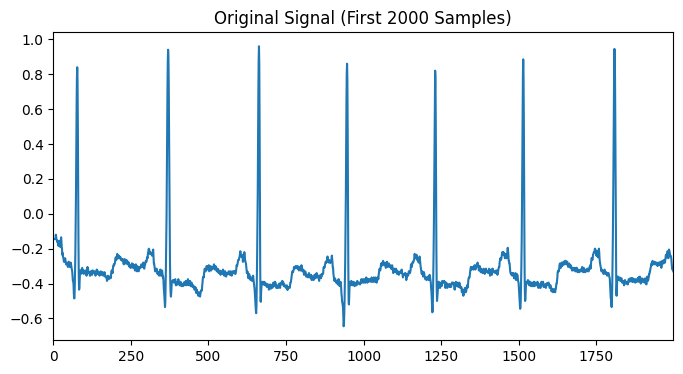

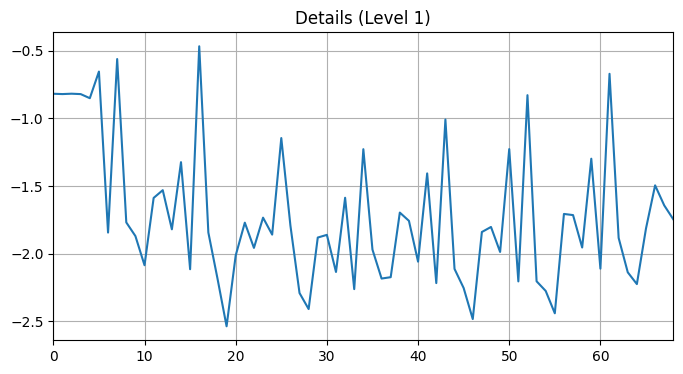

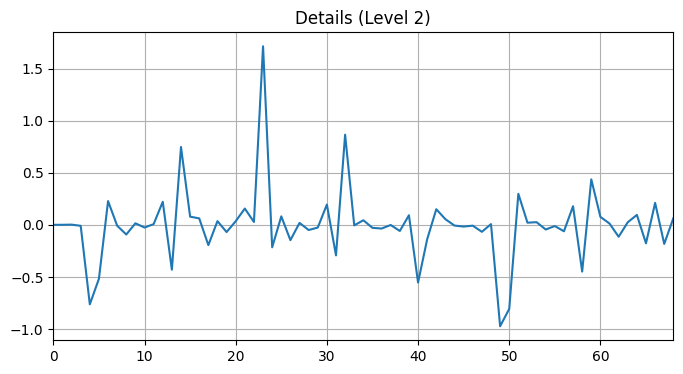

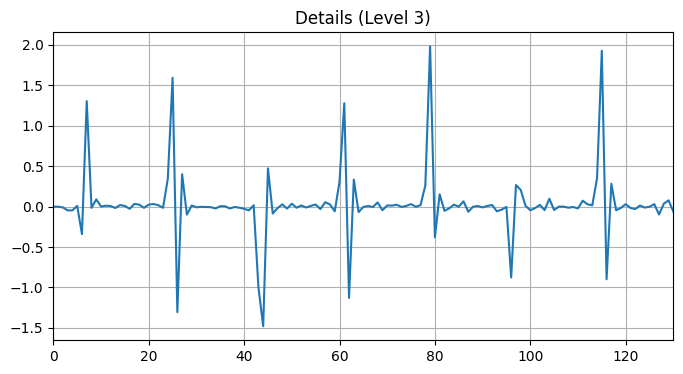

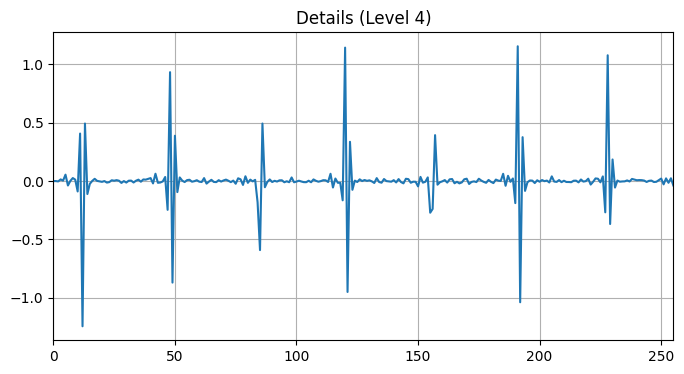

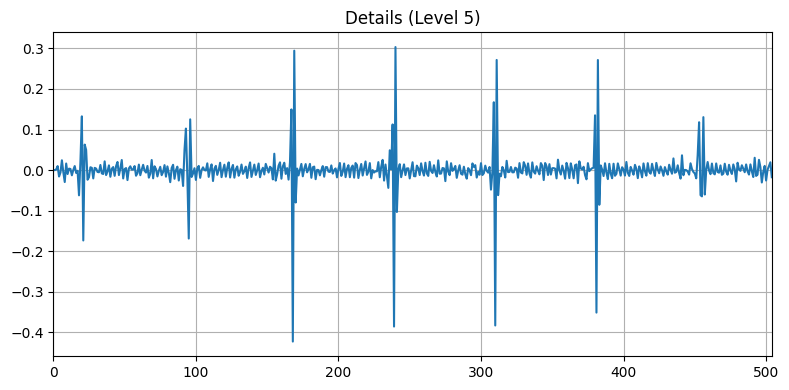

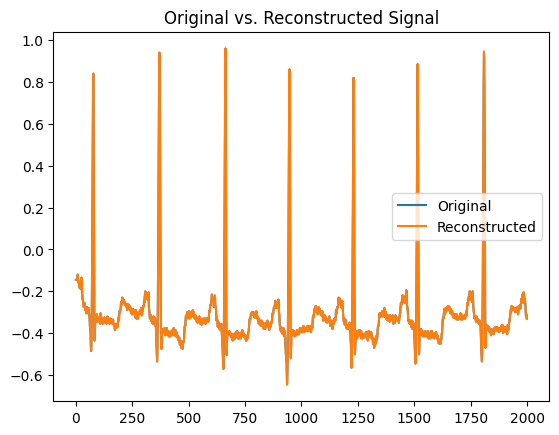

Reconstruction Error: 1.1785537823438828e-16


In [48]:

import numpy as np
import pywt
import matplotlib.pyplot as plt
import wfdb

# 1. Load WFDB signal
record = wfdb.rdrecord('100', pn_dir='mitdb')
wfdb_signal = record.p_signal[:, 0]
signal_length = 2000
original_signal = wfdb_signal[:signal_length]

# 2. Perform DWT
wavelet = 'db4'
levels = 5

coeffs = pywt.wavedec(original_signal, wavelet, level=levels)

# Print the levels from coeffs
for i in range(levels + 1):  # +1 to include the coarsest approximation
    if i == 0:
        print(f"Level {levels} Approximation: Length = {len(coeffs[i])}") # Coarsest level approximation
    else:
        print(f"Level {i} Details: Length = {len(coeffs[i])}")


# 3. Plot the original signal
plt.figure(figsize=( 8,4))
plt.plot(original_signal)
plt.title('Original Signal (First 2000 Samples)')
plt.xlim(0, signal_length - 1)

# 4. Plot details and approximations at each level
for i in range(levels):
    # Details
    cD = coeffs[i]
    plt.figure(figsize=(8, 4))
    plt.grid(True)
    plt.plot(cD)
    plt.title(f'Details (Level {i+1})')
    plt.xlim(0, len(cD) - 1)


plt.tight_layout()
plt.show()

# 6. Reconstruction and Verification (Optional)
reconstructed_signal = pywt.waverec(coeffs, wavelet)
min_len = min(len(original_signal), len(reconstructed_signal))
original_signal = original_signal[:min_len]
reconstructed_signal = reconstructed_signal[:min_len]

plt.figure()
plt.plot(original_signal, label='Original')
plt.plot(reconstructed_signal, label='Reconstructed')
plt.legend()
plt.title('Original vs. Reconstructed Signal')
plt.show()

reconstruction_error = np.mean(np.abs(original_signal - reconstructed_signal))
print(f"Reconstruction Error: {reconstruction_error}")